# Runtime Factors

This is the evalutation of the factors that go into the runtime

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl

import DataManagement.DataRetrieval as ext
import DataManagement.DataSelection as ed
import importlib
import warnings

from RuntimePrediction.Predict import Predictor as P
warnings.filterwarnings("ignore")

In [2]:
ff = 'DejaVu Serif'
#ff = 'DejaVu Sans'
mpl.rc('font', family=ff)

In [3]:
full_df = pd.read_csv('full_df.tsv', sep='\t')
full_df.loc[:, 'args'] = full_df['args'].astype('str').map(lambda s: eval(s) if s and s !='nan' else [])

In [4]:
df = ed.prune(full_df)   # Only take successful data analytics tasks
df = ed.transform(df)  # Add info, such as total available memory, cash spent, data size

In [5]:
sort_df = ed.select_algorithm(df, 'Sort')
grep_df = ed.select_algorithm(df, 'Grep')
sgd_df = ed.select_algorithm(df, 'SGDLR')
km_df = ed.select_algorithm(df, 'KMeans')
pr_df = ed.select_algorithm(df, 'PageRank')

### Data Characteristics

In [6]:
def get_medians(df, by):
    g = df.groupby(by=by)
    return pd.DataFrame(g.median().to_records())  # Puts gross_rt to end!!


In [7]:
xs = []
ys = []
titles = []
labels = []

# Sort
m_df = sort_df[sort_df['machine_type'] == 'r4.2xlarge']
m_df = m_df[m_df['data_size'] != 9530]  # Disregard line length experiment
m_df = m_df[m_df['instance_count'] == 2]
m_df = get_medians(m_df, by=['data_size'])
xs.append(list(m_df['data_size']//1e3))
ys.append(list(m_df['gross_runtime']))
labels.append('Data Size (GB)')
titles.append('Sort: Data Size')

# Grep
m_df = grep_df[grep_df['machine_type'] == 'm4.2xlarge']
m_df = m_df[m_df['instance_count'] == 2]
m_df = get_medians(m_df, by=['data_size', 'p_occurrence'])
a_df = m_df[m_df['p_occurrence'] == 0.5]
b_df = m_df[m_df['data_size'] == 15150]

xs.append(list(a_df['data_size']//1e3))
ys.append(list(a_df['gross_runtime']))
labels.append('Data Size (GB)')
titles.append('Grep: Data Size')

xs.append(list(b_df['p_occurrence']))
ys.append(list(b_df['gross_runtime']))
labels.append('Keywords per Line')
titles.append('Grep: Keyword Occurrence')

# SGD
m_df = sgd_df[sgd_df['machine_type'] == 'r4.2xlarge']
m_df = m_df[m_df['instance_count'] == 4]
m_df = m_df[m_df['iterations'] == 25]
m_df = get_medians(m_df, by=['data_size', 'features'])
a_df = m_df[m_df['features'] == 5]
b_df = m_df[m_df['data_points'] == 100000000]

xs.append(list(a_df['data_points']//1e6))
ys.append(list(a_df['gross_runtime']))
labels.append('Data Points (Millions)')
titles.append('SGD: Data Points')

xs.append(list(b_df['features']))
ys.append(list(b_df['gross_runtime']))
labels.append('Features per Datapoint')
titles.append('SGD: Features')

# KMeans
m_df = km_df[km_df['machine_type'] == 'r4.2xlarge']
m_df = m_df[m_df['instance_count'] == 4]
m_df = m_df[m_df['k'] == 9]
m_df = get_medians(m_df, by=['data_points', 'features'])
a_df = m_df[m_df['features'] == 5]
b_df = m_df[m_df['data_points'] == 100000000]

xs.append(list(a_df['data_points']//1e6))
ys.append(list(a_df['gross_runtime']))
labels.append('Data Points (Millions)')
titles.append('K-Means: Data Points')

xs.append(list(b_df['features']))
ys.append(list(b_df['gross_runtime']))
labels.append('Features per Datapoint')
titles.append('K-Means: Features')

# PageRank
m_df = pr_df[pr_df['machine_type'] == 'r4.2xlarge']
m_df = m_df[m_df['instance_count'] == 6]
m_df = m_df[m_df['distribution'] == 'uniform']
m_df = m_df[m_df['convergence_criterion'] == 0.001]
m_df = get_medians(m_df, by=['pages', 'links'])
a_df = m_df[m_df['pages'] == 2000000]
b_df = m_df[m_df['links'] == 20000000]
    
xs.append(list(a_df['links']//1e6))
ys.append(list(a_df['gross_runtime']))
labels.append('Links (Millions)')
titles.append('PageRank: Links')

xs.append(list(b_df['pages']//1e6))
ys.append(list(b_df['gross_runtime']))
labels.append('Unique Pages (Millions)')
titles.append('PageRank: Unique Pages')

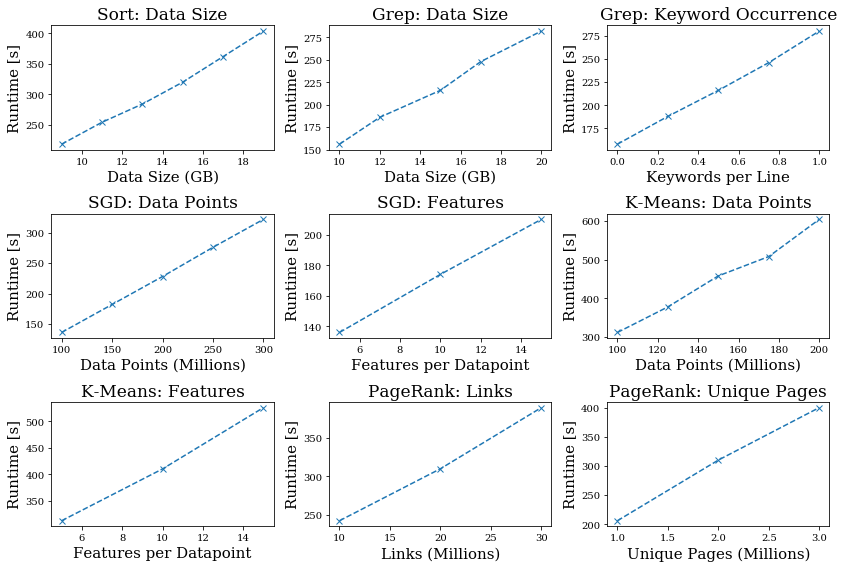

In [8]:
plt.figure(figsize=(12,8))

for i, (x, y, title, label) in enumerate(zip(xs, ys, titles, labels)):
    
    plt.subplot(3,3,i+1)
    plt.title(title, fontsize=17)
    plt.plot(x, y, 'x--', label='Data')

    plt.xlabel(label, fontsize=15)
    plt.ylabel('Runtime [s]', fontsize=15)
    
plt.tight_layout()    
plt.savefig('figures/problem_size.pdf', bbox_inches='tight')
plt.show()

### Input Parameters

In [9]:
xs = []
ys = []
titles = []
labels = []

# SGD
m_df = sgd_df[sgd_df['machine_type'] == 'r4.2xlarge']
m_df = m_df[m_df['instance_count'] == 4]
m_df = m_df[m_df['features'] == 5]
m_df = m_df[m_df['data_points'] == 200000000]
m_df = get_medians(m_df, by=['iterations'])

xs.append(list(m_df['iterations']))
ys.append(list(m_df['gross_runtime']))
labels.append('Iterations')
titles.append('SGD: Iterations')

# KMeans
m_df = km_df[km_df['machine_type'] == 'r4.2xlarge']
m_df = m_df[m_df['instance_count'] == 4]
m_df = m_df[m_df['features'] == 5]
m_df = m_df[m_df['data_points'] == 200000000]
m_df = get_medians(m_df, by=['k'])

xs.append(list(m_df['k']))
ys.append(list(m_df['gross_runtime']))
labels.append('k')
titles.append('K-Means: k')

# PageRank
m_df = pr_df[pr_df['machine_type'] == 'r4.2xlarge']
m_df = m_df[m_df['instance_count'] == 4]
m_df = m_df[m_df['distribution'] == 'uniform']
#m_df = m_df[m_df['convergence_criterion'] == 0.001]
m_df = m_df[m_df['pages'] == 2000000]
m_df = m_df[m_df['links'] == 20000000]
m_df = get_medians(m_df, by=['convergence_criterion'])
    
xs.append(list(m_df['convergence_criterion']))
ys.append(list(m_df['gross_runtime']))
labels.append('Convergence Criterion')
titles.append('PageRank: Conv. Criterion')

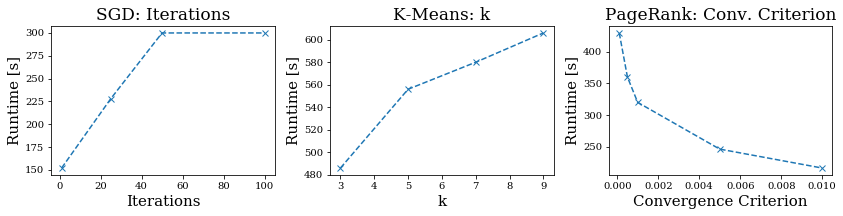

In [10]:
plt.figure(figsize=(12,8))

for i, (x, y, title, label) in enumerate(zip(xs, ys, titles, labels)):
    
    plt.subplot(3,3,i+1)
    plt.title(title, fontsize=17)
    plt.plot(x, y, 'x--', label='Data')

    plt.xlabel(label, fontsize=15)
    plt.ylabel('Runtime [s]', fontsize=15)
    
plt.tight_layout()    
plt.savefig('figures/parameters.pdf', bbox_inches='tight')
plt.show()

## Machine Type Efficiency

In [11]:
def get_medians(df):
    g = df.groupby(by=['machine_type','instance_count'])
    return pd.DataFrame(g.median().to_records())  # Puts gross_rt to end!!


m_df = sort_df[sort_df['data_size'] == 11556]
xyr = get_medians(m_df[m_df['machine_type'] == 'r4.2xlarge'])
xym = get_medians(m_df[m_df['machine_type'] == 'm4.2xlarge'])
xyc = get_medians(m_df[m_df['machine_type'] == 'c4.2xlarge'])



In [12]:
titles = []
colors = []
dfs = []
labels = []

# Sort 
m_df = sort_df[sort_df['data_size'] == 11556]
xyr = get_medians(m_df[m_df['machine_type'] == 'r4.2xlarge'])
xym = get_medians(m_df[m_df['machine_type'] == 'm4.2xlarge'])
xyc = get_medians(m_df[m_df['machine_type'] == 'c4.2xlarge'])

titles.append('Sort')
colors.append(('tab:blue', 'tab:orange', 'tab:green'))
labels.append(('r4.2xlarge', 'm4.2xlarge', 'c4.2xlarge'))
dfs.append((xyr, xym, xyc))

# Grep
m_df = grep_df[grep_df['data_size'] == 15150]
m_df = m_df[m_df['p_occurrence'] == 0.5]
xyr = get_medians(m_df[m_df['machine_type'] == 'r4.2xlarge'])
xym = get_medians(m_df[m_df['machine_type'] == 'm4.2xlarge'])
xyc = get_medians(m_df[m_df['machine_type'] == 'c4.2xlarge'])

titles.append('Grep')
colors.append(('tab:blue', 'tab:orange', 'tab:green'))
labels.append(('r4.2xlarge', 'm4.2xlarge', 'c4.2xlarge'))
dfs.append((xyr, xym, xyc))

# SGD
m_df = sgd_df[sgd_df['data_size'] == 19353]
m_df = m_df[m_df['iterations'] == 25]
m_df = m_df[m_df['instance_count'] > 2]
m_df = m_df.sort_values(by=['gross_runtime'])  # doesn't do anything?
xyr = get_medians(m_df[m_df['machine_type'] == 'r4.2xlarge'])
xym = get_medians(m_df[m_df['machine_type'] == 'm4.2xlarge'])
xyc = get_medians(m_df[m_df['machine_type'] == 'r4.xlarge'])

titles.append('SGD')
colors.append(('tab:blue', 'tab:orange', 'tab:red'))
labels.append(('r4.2xlarge', 'm4.2xlarge', 'r4.xlarge'))
dfs.append((xyr, xym, xyc))

# KMeans
m_df = km_df[km_df['data_size'] == 16000]
m_df = m_df[m_df['k'] == 3]
m_df = m_df[m_df['instance_count'] > 2]
m_df = m_df.sort_values(by=['gross_runtime'])  # doesn't do anything?
xyr = get_medians(m_df[m_df['machine_type'] == 'r4.2xlarge'])
xym = get_medians(m_df[m_df['machine_type'] == 'm4.2xlarge'])
xyc = get_medians(m_df[m_df['machine_type'] == 'r4.xlarge'])

titles.append('K-Means')
colors.append(('tab:blue', 'tab:orange', 'tab:red'))
labels.append(('r4.2xlarge', 'm4.2xlarge', 'r4.xlarge'))
dfs.append((xyr, xym, xyc))

# PageRank
m_df = pr_df[pr_df['data_size'] == 284]
m_df = m_df[m_df['convergence_criterion'] == 0.001]
m_df = m_df.sort_values(by=['gross_runtime'])  # doesn't do anything?
xyr = get_medians(m_df[m_df['machine_type'] == 'r4.2xlarge'])
xym = get_medians(m_df[m_df['machine_type'] == 'm4.2xlarge'])
xyc = get_medians(m_df[m_df['machine_type'] == 'r4.xlarge'])

titles.append('PageRank')
colors.append(('tab:blue', 'tab:orange', 'tab:red'))
labels.append(('r4.2xlarge', 'm4.2xlarge', 'r4.xlarge'))
dfs.append((xyr, xym, xyc))


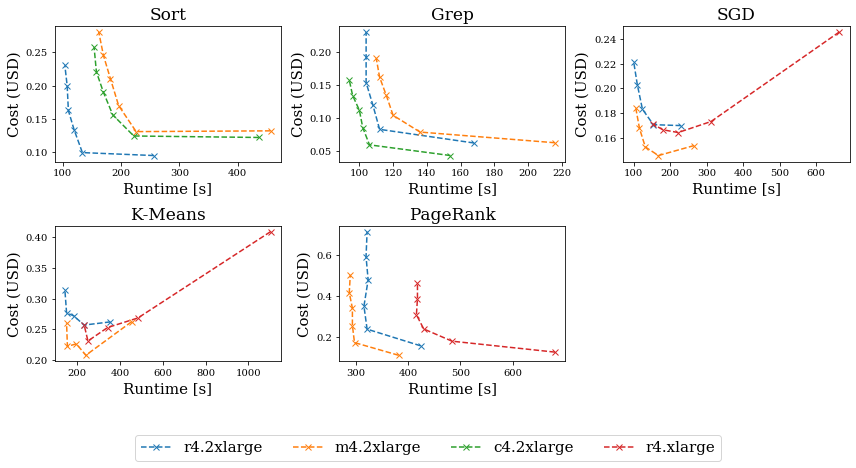

In [13]:
plt.figure(figsize=(12,8))

lines = []
seen_colors = []
for i, (dfsx, title, colorsx, labelsx) in enumerate(zip(dfs, titles, colors, labels)):
    plt.subplot(3,3,i+1)
    plt.title(title, fontsize=17)
    for (data, color, label) in zip(dfsx, colorsx, labelsx):
        x, y = data['cost'], data['gross_runtime']
        line = plt.plot(y, x, 'x--', color=color, label=label)
        if color not in seen_colors:
            lines += line
            seen_colors.append(color)

    plt.xlabel('Runtime [s]', fontsize=15)
    plt.ylabel('Cost (USD)', fontsize=15)
plt.figlegend(lines, ['r4.2xlarge', 'm4.2xlarge', 'c4.2xlarge', 'r4.xlarge'], fontsize=15, loc='lower center', ncol=4, bbox_to_anchor=[0.5, +.18], 
              bbox_transform=plt.gcf().transFigure)
plt.tight_layout()
plt.savefig('figures/mtypes.pdf', bbox_inches='tight')
plt.show()

## Scale-Out Behavior

In [14]:
def get_medians(df):
    g = df.groupby(by=['machine_type','instance_count'])
    return pd.DataFrame(g.median().to_records())  # Puts gross_rt to end!!


xs = []
ys = []
xys = []
titles = []

# Sort
m_df = sort_df[sort_df['machine_type'] == 'c4.2xlarge']
m_df = m_df[m_df['data_size'] == 19260]
xys.append(get_medians(m_df))
titles.append('Sort')

# Grep
m_df = grep_df[grep_df['machine_type'] == 'm4.2xlarge']
m_df = m_df[m_df['p_occurrence'] == .75]
m_df = m_df[m_df['data_size'] == 20200]

xys.append(get_medians(m_df))
titles.append('Grep')

# SGD
m_df = sgd_df[sgd_df['machine_type'] == 'r4.2xlarge']
m_df = m_df[m_df['iterations'] == 25]
m_df = m_df[m_df['features'] == 5]
m_df = m_df[m_df['data_points'] == 200000000]

xys.append(get_medians(m_df))
titles.append('SGD')

# KMeans
m_df = km_df[km_df['machine_type'] == 'r4.2xlarge']
m_df = m_df[m_df['k'] == 9]
m_df = m_df[m_df['features'] == 5]
m_df = m_df[m_df['data_points'] == 200000000]

xys.append(get_medians(m_df))
titles.append('K-Means')

# PageRank
m_df = pr_df[pr_df['machine_type'] == 'r4.2xlarge']
m_df = m_df[m_df['distribution'] == 'uniform']
m_df = m_df[m_df['convergence_criterion'] == 0.0005]
m_df = m_df[m_df['pages'] == 3000000]
m_df = m_df[m_df['links'] == 30000000]
    
xys.append(get_medians(m_df))
titles.append('PageRank')


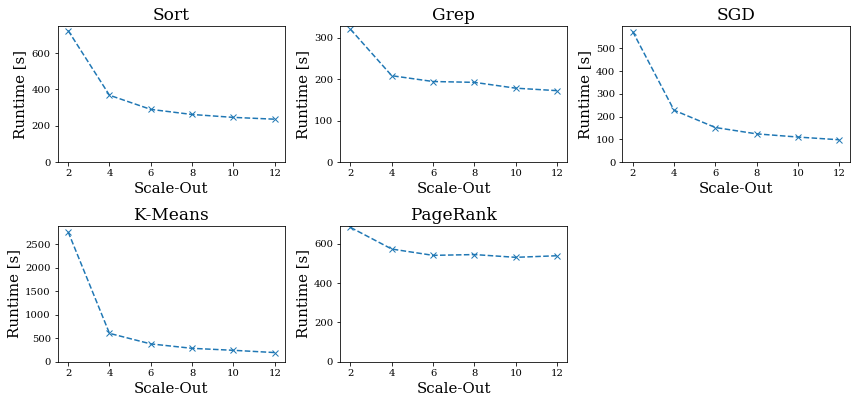

In [15]:
plt.figure(figsize=(12,8))

for i, (xy, title) in enumerate(zip(xys, titles)):
    
    plt.subplot(3,3,i+1)
    plt.title(title, fontsize=17)
    plt.plot(xy['instance_count'], xy['gross_runtime'], 'x--')

    plt.xlabel('Scale-Out', fontsize=15)
    plt.ylabel('Runtime [s]', fontsize=15)
    plt.ylim(ymin=0)
    
plt.tight_layout()    
plt.savefig('figures/scaleout.pdf', bbox_inches='tight')
plt.show()

## Scale-out vs Other Factors

In [16]:
def get_medians(df, by):
    g = df.groupby(by=by)
    return pd.DataFrame(g.median().to_records())  # Puts gross_rt to end!!


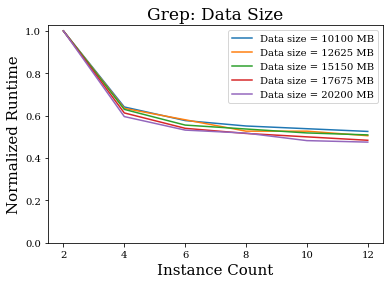

In [17]:
m_df = grep_df[grep_df['machine_type'] == 'm4.2xlarge']

plt.figure(figsize=(6,4))
plt.title('Grep: Data Size', fontsize=17)
plt.xlabel('Instance Count', fontsize=15)
plt.ylabel('Normalized Runtime', fontsize=15)

for ds in sorted(set(m_df['data_size'])):
    o_df = m_df.sort_values(by=['instance_count'])
    o_df = o_df[o_df['p_occurrence'] == 0.5]
    o_df = o_df[o_df['data_size'] == ds]
    o_df = get_medians(o_df, ['data_size', 'instance_count'])
    X, y = ed.get_training_data(o_df)
    plt.plot(X[:, 0], y/max(y), '-' , label=f'Data size = {ds:05.0f} MB');
    

plt.legend()
plt.ylim(ymin=0)
plt.savefig('figures/grep_ds_scaleout.pdf')
plt.show()

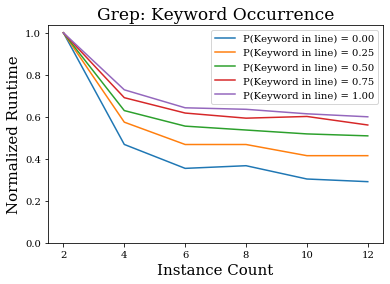

In [18]:
m_df = grep_df[grep_df['machine_type'] == 'm4.2xlarge']

plt.figure(figsize=(6,4))
plt.title('Grep: Keyword Occurrence', fontsize=17)
plt.xlabel('Instance Count', fontsize=15)
plt.ylabel('Normalized Runtime', fontsize=15)

for po in sorted(set(m_df['p_occurrence'])):
    o_df = m_df.sort_values(by=['instance_count'])
    o_df = o_df[o_df['data_size'] == 15150]
    o_df = o_df[o_df['p_occurrence'] == po]
    o_df = get_medians(o_df, by=['instance_count'])
    X, y = ed.get_training_data(o_df)
    plt.plot(X[:, 0], y/max(y), label=f'P(Keyword in line) = {po:.2f}');
    
    
plt.legend()
plt.ylim(ymin=0)
plt.savefig('figures/grep_occ_scaleout.pdf')
plt.show()

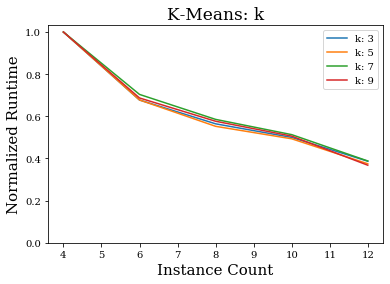

In [19]:
plt.figure(figsize=(6,4))
plt.title('K-Means: k', fontsize=17)
plt.xlabel('Instance Count', fontsize=15)
plt.ylabel('Normalized Runtime', fontsize=15)

m_df = km_df[km_df['machine_type'] == 'r4.2xlarge']

for k in sorted(set(m_df['k'])):
    o_df = m_df.sort_values(by=['instance_count'])
    o_df = o_df[o_df['instance_count'] > 2]
    o_df = o_df[o_df['k'] == k]
    o_df = o_df[o_df['features'] == 5]
    o_df = o_df[o_df['data_points'] == 100000000]
    X, y = ed.get_training_data(o_df)
    plt.plot(X[:, 0], y/max(y), label=f'k: {k}');
    
plt.legend()
plt.ylim(ymin=0)
plt.savefig('figures/kmeans_k_scaleout.pdf')
plt.show()

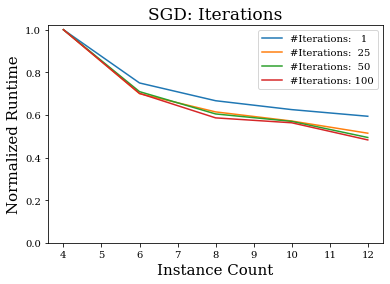

In [20]:
plt.figure(figsize=(6,4))
plt.title('SGD: Iterations', fontsize=17)
plt.xlabel('Instance Count', fontsize=15)
plt.ylabel('Normalized Runtime', fontsize=15)

m_df = sgd_df[sgd_df['machine_type'] == 'r4.2xlarge']
for it in sorted(set(m_df['iterations'])):
    o_df = m_df.sort_values(by=['instance_count'])
    o_df = o_df[o_df['instance_count'] > 2]
    o_df = o_df[o_df['iterations'] == it]
    o_df = o_df[o_df['features'] == 5]
    o_df = o_df[o_df['data_points'] == 100000000]
    X, y = ed.get_training_data(o_df)
    plt.plot(X[:, 0], y/max(y), label=f'#Iterations: {it:3.0f}');
    plt.ylim(ymin=0)
    
plt.legend()
plt.ylim(ymin=0)
plt.savefig('figures/sgd_iterations_scaleout.pdf')
plt.show()